In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Online Retail.csv to Online Retail.csv


In [3]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
df.isna().sum()

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M:%S')

In [5]:
df['Total price'] = df['UnitPrice'] * df['Quantity']
df['Transaction'] = df['Quantity'].apply(lambda x: 'Sold' if x < 0 else 'Bought')
df = df[df['Total price'] >= 0]

le=LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

df['Time'] = df['InvoiceDate'].dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 else ('Morning' if x < 12 else ('Noon' if x < 14 else ('Afternoon' if x < 18 else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

<ipython-input-5-9e220d1bfd5f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = le.fit_transform(df['Country'])
<ipython-input-5-9e220d1bfd5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = df['InvoiceDate'].dt.hour


Accuracy: 0.9155964852990875
Confusion Matrix: [[   12     0     0 ...     0   217     0]
 [    0     0     0 ...     0    68     0]
 [    0     0     0 ...     0     3     0]
 ...
 [    0     0     0 ...     0    11     0]
 [   14     0     0 ...     0 97324     0]
 [    0     0     0 ...     0    84     0]]


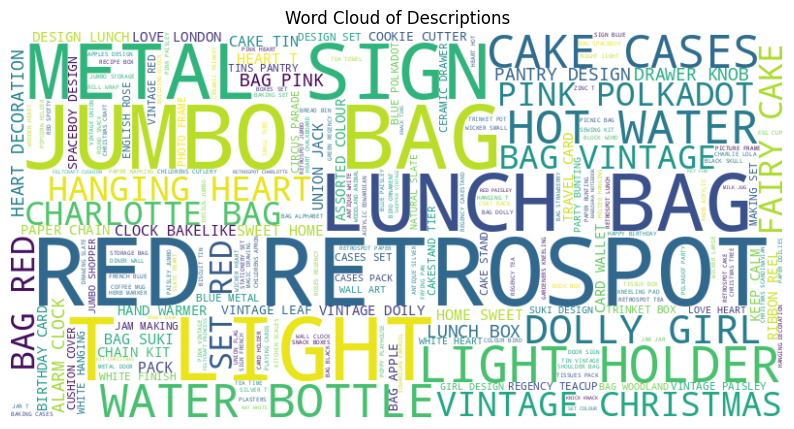

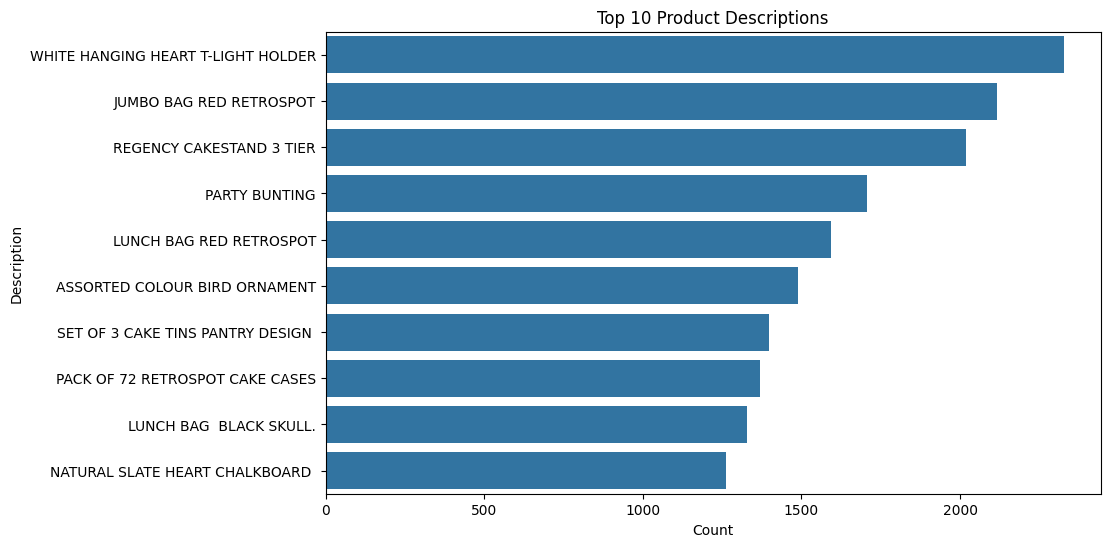

In [12]:
#model training
features = df[['Quantity', 'UnitPrice', 'Total price']]
target = df['Country']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)

new_data = pd.DataFrame({
    'Quantity': [100],
    'UnitPrice': [0.7],
    'Amount': [70]
})

#wordcloud graph
descriptions = ' '.join(df['Description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

#bar graph of top 10 products
top_10_descriptions = df['Description'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_descriptions.values, y=top_10_descriptions.index)
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Product Descriptions')
plt.show()